<a href="https://colab.research.google.com/github/Jang-Boa/Project_S6/blob/main/AI_04_%EC%9E%A5%EB%B3%B4%EC%95%84_%EC%99%80%ED%94%8C_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn import svm
import pandas as pd
import os
import tqdm
path = "drive/MyDrive/Waffle"

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
input_dir = os.path.join(os.getcwd(), path) # 파일 위치
file_list = os.listdir(input_dir) # 폴더 

dataset_list = []
for f_name in file_list:
    filename = os.path.join(input_dir, f_name)
    df = pd.read_csv(filename, index_col=0)
    ecg = df['ecg'].to_numpy()
    bpm = df['bpm'].to_numpy()
    df = df.drop(['ecg', 'bpm'], axis=1)
    temp = {
        'data': df.to_numpy(),
        'target_ecg': ecg,
        'target_bpm':bpm,
        'frame': df.index.to_numpy(),
        'feature_names': list(df.columns),
        'filename': filename,
    }
    dataset_list.append(temp)

In [ ]:
print("총 데이터 갯수: ",len(dataset_list))
print("---" * 10)
print(dataset_list[0].keys())
print("---" * 10)
for d in dataset_list:
  print(d['filename'])

총 데이터 갯수:  11
------------------------------
dict_keys(['data', 'target_ecg', 'target_bpm', 'frame', 'feature_names', 'filename'])
------------------------------
/content/drive/MyDrive/Waffle/log_20200909110309_chc_0.5_sit_none.csv
/content/drive/MyDrive/Waffle/log_20201111155643_ksj_0.5_lie_none.csv
/content/drive/MyDrive/Waffle/log_20210811104835_les_1.0_sleep.csv
/content/drive/MyDrive/Waffle/log_20210812111825_sjy_1.0_lie_none.csv
/content/drive/MyDrive/Waffle/log_20210818153244_kdu_1.0_lie_none.csv
/content/drive/MyDrive/Waffle/log_20210824111504_kdu_1.0_lie_none.csv
/content/drive/MyDrive/Waffle/log_20210824121025_chc_0.5_lie_none.csv
/content/drive/MyDrive/Waffle/log_20210824141813_kdu_1.0_lie_acryl.csv
/content/drive/MyDrive/Waffle/log_20210824141815_kdu_1.0_lie_opaque.csv
/content/drive/MyDrive/Waffle/log_20210906175352_1.0_lie_gmk.csv
/content/drive/MyDrive/Waffle/log_20210908142718_kdu_1.0_lie_acryl111.csv


In [ ]:
dataset_list[0]

{'data': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [90.234375  , 89.0625    , 83.203125  , ..., 91.40625   ,
          0.        ,  1.15815214],
        [90.234375  , 89.0625    , 83.203125  , ..., 91.40625   ,
          0.        ,  1.15815214],
        [90.234375  , 89.0625    , 83.203125  , ..., 91.40625   ,
          0.        ,  1.15815214]]),
 'feature_names': ['bin-2',
  'bin-1',
  'bin0',
  'bin1',
  'bin2',
  '512fft',
  '400fft',
  '300fft',
  '200fft',
  '100fft',
  '70fft',
  'bin_var',
  'motion_energy'],
 'filename': '/content/drive/MyDrive/Waffle/log_20200909110309_chc_0.5_sit_none.csv',
 'frame': array([    0,     1,     2, ..., 23997, 23998, 23999]),
 'target_bpm': array([86.953125  , 86.98

In [ ]:
data = dataset_list[0]
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df['bpm'] = data['target_bpm']
df.dropna(inplace=True)
df

,bin-2,bin-1,bin0,bin1,bin2,512fft,400fft,300fft,200fft,100fft,70fft,bin_var,motion_energy,bpm
0,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,86.953125
1,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,86.989083
2,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,87.025041
3,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,87.061000
4,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,87.096958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,90.234375,89.0625,83.203125,90.234375,51.5625,83.203125,97.265625,82.031250,94.921875,92.578125,91.40625,0.0,1.158152,89.765625
23996,90.234375,89.0625,83.203125,90.234375,51.5625,83.203125,97.265625,82.031250,94.921875,92.578125,91.40625,0.0,1.158152,89.765625
23997,90.234375,89.0625,83.203125,90.234375,51.5625,83.203125,97.265625,82.617188,94.921875,92.578125,91.40625,0.0,1.158152,89.765625
23998,90.234375,89.0625,83.203125,90.234375,51.5625,83.203125,97.851562,82.617188,94.921875,92.578125,91.40625,0.0,1.158152,89.765625


# Make DataSet Function
데이터 셋을 차례로 불러와 정규화 작업 진행 후, 훈련 데이터, 검증 데이터, 테스트 데이터로 나누어 주어 그 값을 반환합니다.

In [ ]:
def make_dataset(data):
  print("이번에 사용한 데이터셋: ",data['filename'])
  df = pd.DataFrame(data['data'],columns=data['feature_names'])
  df['bpm'] = data['target_bpm']
  df.dropna(inplace=True)

  X = df.drop(['bpm'],axis=1).values
  y = df['bpm'].values
  y = np.reshape(y,(-1,1))

  # Normalization
  scaler_X = MinMaxScaler()
  scaler_y = MinMaxScaler()

  X_scale = scaler_X.fit_transform(X)
  y_scale = scaler_y.fit_transform(y)

  X_train, X_val, y_train, y_val = train_test_split(X_scale, y_scale, test_size=0.4, random_state=42)
  X_test, X_val, y_test, y_val = train_test_split(X_val, y_val,test_size=0.5, random_state=42)

  return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
dataset_1 = dataset_list[0]
X_train, X_val, X_test, y_train, y_val, y_test = make_dataset(dataset_1)

이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20200909110309_chc_0.5_sit_none.csv


In [ ]:
X = df.drop(['bpm'],axis=1).values
y = df['bpm'].values
y = np.reshape(y,(-1,1))

# Normalization
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scale = scaler_X.fit_transform(X)
y_scale = scaler_y.fit_transform(y)
df_x = pd.DataFrame(X_scale,columns=data['feature_names'])
df_x['bpm'] = y_scale
df_x

,bin-2,bin-1,bin0,bin1,bin2,512fft,400fft,300fft,200fft,100fft,70fft,bin_var,motion_energy,bpm
0,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00000,0.00000,0.00,0.0,0.000000,0.390476
1,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00000,0.00000,0.00,0.0,0.000000,0.391937
2,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00000,0.00000,0.00,0.0,0.000000,0.393399
3,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00000,0.00000,0.00,0.0,0.000000,0.394860
4,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00000,0.00000,0.00,0.0,0.000000,0.396321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.802083,0.752475,0.71,0.754902,0.44,0.71,0.817734,0.686275,0.79803,0.77451,0.78,0.0,0.123253,0.504762
23996,0.802083,0.752475,0.71,0.754902,0.44,0.71,0.817734,0.686275,0.79803,0.77451,0.78,0.0,0.123253,0.504762
23997,0.802083,0.752475,0.71,0.754902,0.44,0.71,0.817734,0.691176,0.79803,0.77451,0.78,0.0,0.123253,0.504762
23998,0.802083,0.752475,0.71,0.754902,0.44,0.71,0.822660,0.691176,0.79803,0.77451,0.78,0.0,0.123253,0.504762


# PCA
주성분분석

In [ ]:
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df['bpm'] = data['target_bpm']
df.dropna(inplace=True)

X = df.drop(['bpm'],axis=1).values
y = df['bpm'].values
y = np.reshape(y,(-1,1))

# Normalization
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scale = scaler_X.fit_transform(X)
y_scale = scaler_y.fit_transform(y)

In [ ]:
pca = PCA()
pca.fit(X_scale)
PC_score = pca.transform(X_scale)
PC_score.shape

(24000, 13)

In [ ]:
ratio = pca.explained_variance_ratio_
ratio

array([3.60867997e-01, 2.27690352e-01, 8.24499673e-02, 6.20296717e-02,
       5.31751980e-02, 4.29546287e-02, 4.07488724e-02, 3.56599814e-02,
       2.91851997e-02, 2.53811846e-02, 2.27896036e-02, 1.70673432e-02,
       2.11460113e-31])

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_scale)
# 주성분으로 이루어진 데이터 프레임 구축
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component1', 'principal component2', 'principal component3'])
principalDf.head()

,principal component1,principal component2,principal component3
0,1.890833,1.464437,0.006162
1,1.890833,1.464437,0.006162
2,1.890833,1.464437,0.006162
3,1.890833,1.464437,0.006162
4,1.890833,1.464437,0.006162


In [ ]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.360868   0.22769035 0.08244997]
0.6710083166845482


# Make Model Fuction 


## Base Model

In [ ]:
# Model 
def base_model(X_train, X_val, X_test, y_train, y_val, y_test):
  model = Sequential()
  model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
  model.add(Dense(30,activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.summary()
  print("---" * 10)

  model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
  hist_base = model.fit(X_train, y_train, epochs=30, batch_size=150, verbose=1, validation_data=(X_val, y_val))
  print("---" * 10)
  
  score = model.evaluate(X_test,y_test) #, verbose=1
  print('loss=', score[0], 'mse=',score[1],'mae=',score[2],'\n\n')
  print("---" * 10)

  # 모델 학습 과정 표시하기
  %matplotlib inline
  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()
  loss_ax.plot(hist_base.history['loss'],'y',label='train_loss')
  loss_ax.plot(hist_base.history['val_loss'],'r',label='val_loss')
  acc_ax.plot(hist_base.history['mae'],'b',label='train mae')
  acc_ax.plot(hist_base.history['val_mae'],'g',label='val mae')
  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  acc_ax.set_ylabel('mae')
  loss_ax.legend(loc='upper left')
  acc_ax.legend(loc='lower left')
  plt.show()

  # 예측 값 분석 그래프
  y_predict = model.predict(X_test)
  x_ax = range(len(y_test))
  plt.plot(x_ax,y_test,label='Actual')
  plt.plot(x_ax,y_predict,label='Predict')
  plt.legend()
  plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                280       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________
------------------------------
Epoch 1/30
96/96 [==============================] - 3s 7ms/step - loss: 0.0646 - mse: 0.0646 - mae: 0.1969 - val_loss: 0.0306 - val_mse: 0.0306 - val_mae: 0.1440
Epoch 2/30
96/96 [==============================] - 0s 3ms/step - loss: 0.0298 - mse: 0.0298 - mae: 0.1421 - val_loss: 0.0299 - val_mse: 0.0299 - val_mae: 0.1432
Epoch 3/30
96/96 [===============

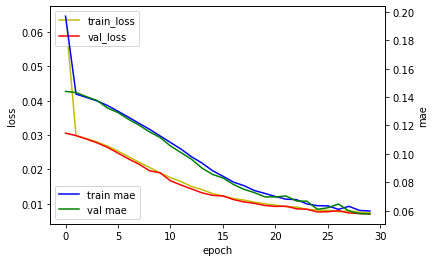

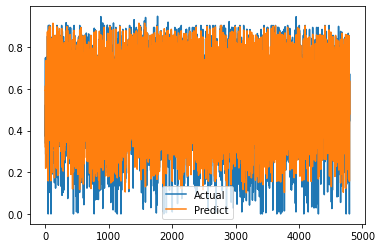

In [ ]:
# 1번 데이터셋으로 돌렸을 때
base_model(X_train, X_val, X_test, y_train, y_val, y_test)

## SVM Model 
kernel = 'rbf', gamma = 'auto'


In [ ]:
# kernel = rbf, gamma = 'auto'
def svm_model(X_train, X_val, X_test, y_train, y_val, y_test):
  model = svm.SVR(kernel='rbf',gamma='auto')
  hist_model = model.fit(X_train, y_train)

  y_val_pred = model.predict(X_val)
  score = model.score(X_val, y_val)
  print("score: ",score)
  mse = mean_squared_error(y_val, y_val_pred)
  mae = mean_absolute_error(y_val, y_val_pred)
  print("MSE = ",mse,"MAE = ",mae,'\n')
  print("---" * 10)

  x_ax = range(len(y_val))
  plt.plot(x_ax, y_val, label='Actual')
  plt.plot(x_ax, y_val_pred, label='Predict')
  plt.legend()
  plt.title("validation data prediction")
  plt.show()

  print("---" * 10)

  y_test_pred = model.predict(X_test)
  score = model.score(X_test, y_test)
  print("score: ",score)
  mse = mean_squared_error(y_test, y_test_pred)
  mae = mean_absolute_error(y_test, y_test_pred)
  print("MSE = ",mse,"MAE = ",mae,'\n')
  print("---" * 10)

  x_ax = range(len(y_test))
  plt.plot(x_ax,y_test,label='Actual')
  plt.plot(x_ax,y_test_pred,label='Predict')
  plt.legend()
  plt.title("test data prediction")
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.7060863487447017
MSE =  0.011368295045611505 MAE =  0.08309804037368576 

------------------------------


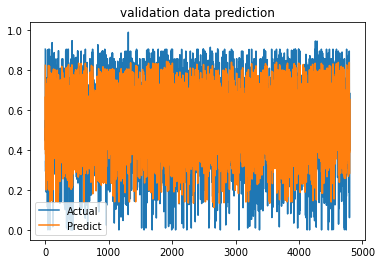

------------------------------
score:  0.6842296502647467
MSE =  0.011892876060255561 MAE =  0.08445984084226248 

------------------------------


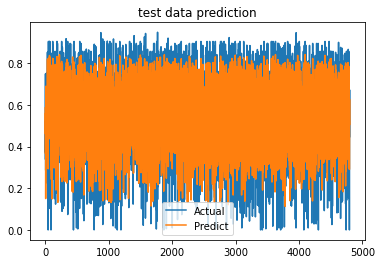

In [ ]:
# 1번 데이터셋으로 돌렸을 때
svm_model(X_train, X_val, X_test, y_train, y_val, y_test)

## RandomForestRegressor Model

In [ ]:
def Grid_Model(X_train,y_train):
  param_grid = [
                {'n_estimators':[10,20,30,40],
                'max_features':[2,4,6,8,10,12],
                'max_depth':[10,30,50,100]}
  ]
  forest_grid = RandomForestRegressor()
  grid_search = GridSearchCV(forest_grid,param_grid=param_grid,cv=5)
  grid_search.fit(X_train,y_train)

  best_para_ = grid_search.best_params_

  return best_para_

In [ ]:
best_para_ = Grid_Model(X_train,y_train)

In [ ]:
def rfr_model(X_train, X_val, X_test, y_train, y_val, y_test):
  model = RandomForestRegressor(max_depth=best_para_['max_depth'],max_features=best_para_['max_features'],n_estimators=best_para_['n_estimators'],random_state=42)
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)
  score = model.score(X_test, y_test)
  print('결정계수 : ',score)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  print("MSE: ",mse)
  print("MAE: ",mae)
  print("---" * 10)

  x_ax = range(len(y_test))
  plt.plot(x_ax,y_test,label='Actual')
  plt.plot(x_ax,y_pred,label='Predict')
  plt.legend()
  plt.title("test data prediction")
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


결정계수 :  0.9984582871714708
MSE:  5.806561510786963e-05
MAE:  0.0022749666541294527
------------------------------


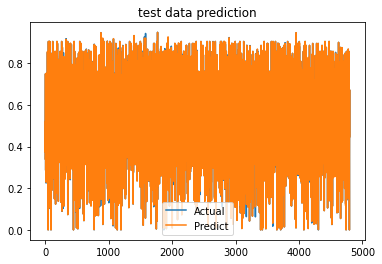

In [ ]:
rfr_model(X_train, X_val, X_test, y_train, y_val, y_test)

# 모든 데이터셋에 적용

## 1 Dataset

이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20200909110309_chc_0.5_sit_none.csv
이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20200909110309_chc_0.5_sit_none.csv
------------------------------------------------------------
Base Model
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_13 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 31        
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________
------------------------------
Epoch 1/30
96/96 [==============================] - 1s 5ms/step - loss: 0.0708 - mse: 0.0708 - mae: 0.2032 - val_

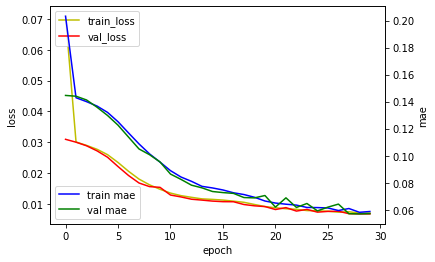

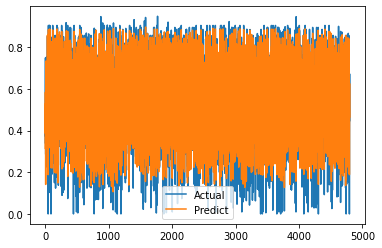

SVM Model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.7060863487447017
MSE =  0.011368295045611505 MAE =  0.08309804037368576 

------------------------------


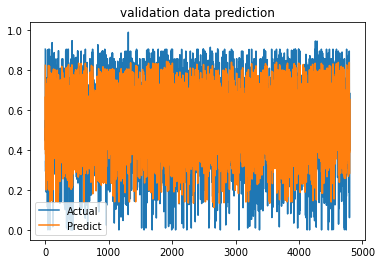

------------------------------
score:  0.6842296502647467
MSE =  0.011892876060255561 MAE =  0.08445984084226248 

------------------------------


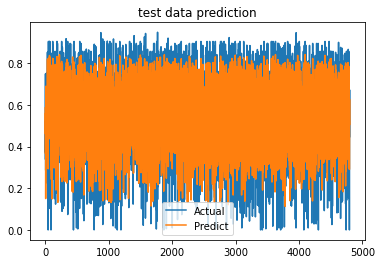

RandomForestRegressor Model


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

결정계수 :  0.9984268493324918
MSE:  5.924966016748819e-05
MAE:  0.002246229313940382
------------------------------


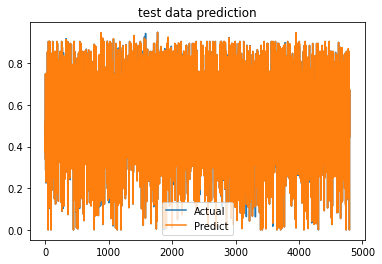

------------------------------------------------------------


In [ ]:
data_1 = dataset_list[0]
print("이번에 사용한 데이터셋: ",data_1['filename'])
X_train, X_val, X_test, y_train, y_val, y_test = make_dataset(data_1)
print('------------'*5)
print("Base Model")
base_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("SVM Model")
svm_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("RandomForestRegressor Model")
best_para_ = Grid_Model(X_train,y_train)
rfr_model(X_train, X_val, X_test, y_train, y_val, y_test)
print('------------'*5)

## 2 DataSet

이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20201111155643_ksj_0.5_lie_none.csv
이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20201111155643_ksj_0.5_lie_none.csv
------------------------------------------------------------
Base Model
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_16 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 31        
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________
------------------------------
Epoch 1/30
53/53 [==============================] - 1s 8ms/step - loss: 0.1925 - mse: 0.1925 - mae: 0.3694 - val_

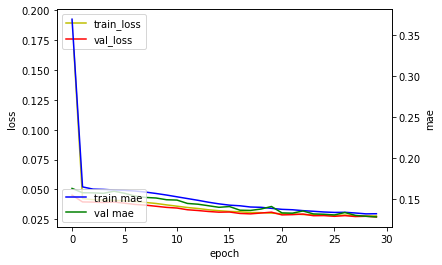

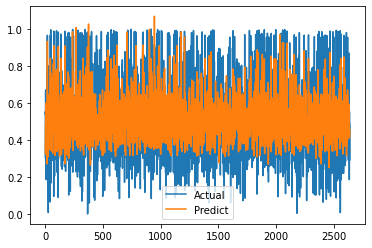

SVM Model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.2488689085918535
MSE =  0.030411013602265887 MAE =  0.1364861421528846 

------------------------------


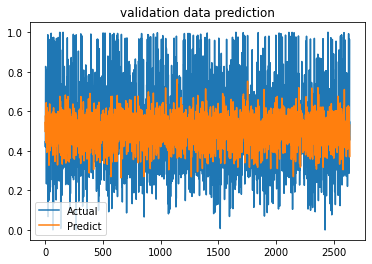

------------------------------
score:  0.25737283575262204
MSE =  0.03182509873508252 MAE =  0.1391235020935241 

------------------------------


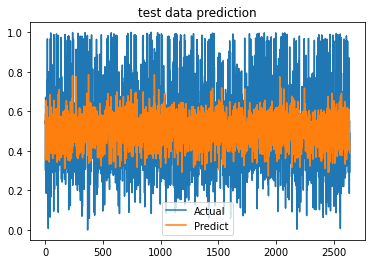

RandomForestRegressor Model


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

결정계수 :  0.9952720712928124
MSE:  0.00020261418537143212
MAE:  0.004658471794953274
------------------------------


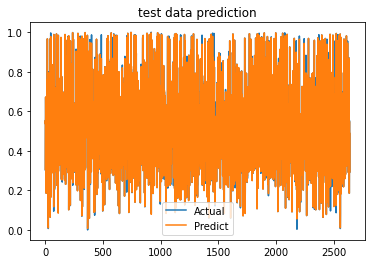

------------------------------------------------------------


In [ ]:
data_2 = dataset_list[1]
print("이번에 사용한 데이터셋: ",data_2['filename'])
X_train, X_val, X_test, y_train, y_val, y_test = make_dataset(data_2)
print('------------'*5)
print("Base Model")
base_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("SVM Model")
svm_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("RandomForestRegressor Model")
best_para_ = Grid_Model(X_train,y_train)
rfr_model(X_train, X_val, X_test, y_train, y_val, y_test)
print('------------'*5)

## 3 DataSet

이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210811104835_les_1.0_sleep.csv
이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210811104835_les_1.0_sleep.csv
------------------------------------------------------------
Base Model
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_31 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 31        
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________
------------------------------
Epoch 1/30
149/149 [==============================] - 2s 7ms/step - loss: 0.0500 - mse: 0.0500 - mae: 0.1770 - val_los

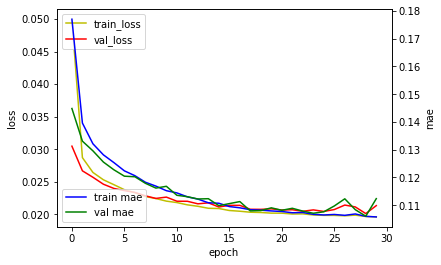

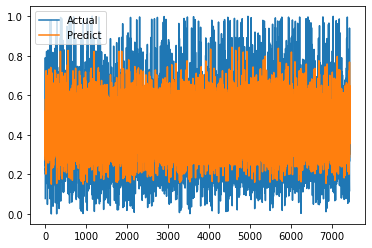

SVM Model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.4169292586250558
MSE =  0.02113677194696838 MAE =  0.11142505456025767 

------------------------------


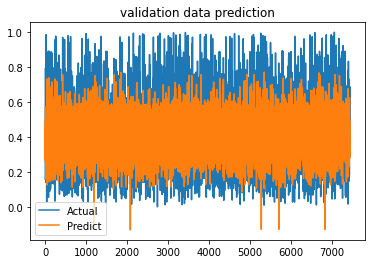

------------------------------
score:  0.41426343799682075
MSE =  0.021235950262662066 MAE =  0.11089372379063356 

------------------------------


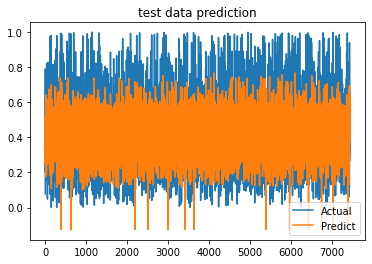

RandomForestRegressor Model


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

결정계수 :  0.9931479332453278
MSE:  0.00024842251318753835
MAE:  0.005055363812293724
------------------------------


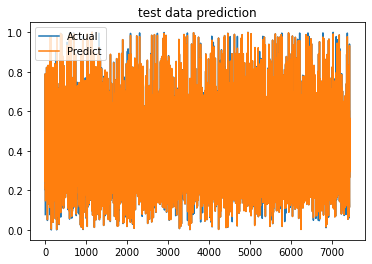

------------------------------------------------------------


In [ ]:
data_3 = dataset_list[2]
print("이번에 사용한 데이터셋: ",data_3['filename'])
X_train, X_val, X_test, y_train, y_val, y_test = make_dataset(data_3)
print('------------'*5)
print("Base Model")
base_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("SVM Model")
svm_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("RandomForestRegressor Model")
best_para_ = Grid_Model(X_train,y_train)
rfr_model(X_train, X_val, X_test, y_train, y_val, y_test)
print('------------'*5)

## 4 DataSet

이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210812111825_sjy_1.0_lie_none.csv
이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210812111825_sjy_1.0_lie_none.csv
------------------------------------------------------------
Base Model
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_34 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 31        
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________
------------------------------
Epoch 1/30
125/125 [==============================] - 1s 5ms/step - loss: 0.0293 - mse: 0.0293 - mae: 0.1273 - v

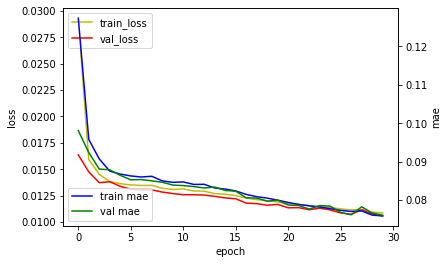

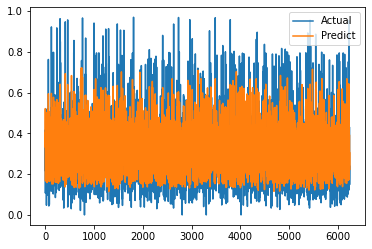

SVM Model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.4400362636612323
MSE =  0.01137839204569571 MAE =  0.07991441888107197 

------------------------------


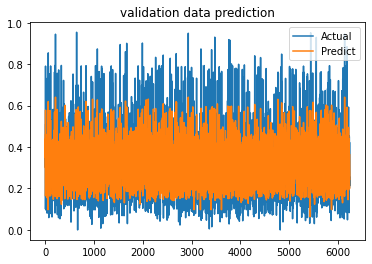

------------------------------
score:  0.4602415703244386
MSE =  0.010986305346546224 MAE =  0.0779471034280115 

------------------------------


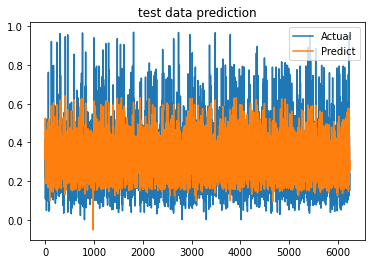

RandomForestRegressor Model


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

결정계수 :  0.993413423677139
MSE:  0.00013406393433221134
MAE:  0.0038146074661775916
------------------------------


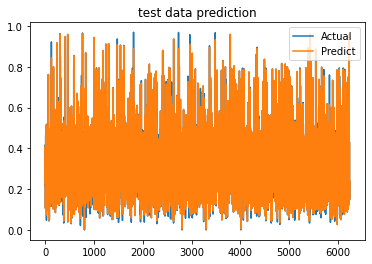

------------------------------------------------------------


In [ ]:
data_4 = dataset_list[3]
print("이번에 사용한 데이터셋: ",data_4['filename'])
X_train, X_val, X_test, y_train, y_val, y_test = make_dataset(data_4)
print('------------'*5)
print("Base Model")
base_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("SVM Model")
svm_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("RandomForestRegressor Model")
best_para_ = Grid_Model(X_train,y_train)
rfr_model(X_train, X_val, X_test, y_train, y_val, y_test)
print('------------'*5)

## 5 DataSet

이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210818153244_kdu_1.0_lie_none.csv
이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210818153244_kdu_1.0_lie_none.csv
------------------------------------------------------------
Base Model
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_37 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 31        
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________
------------------------------
Epoch 1/30
173/173 [==============================] - 1s 5ms/step - loss: 0.0335 - mse: 0.0335 - mae: 0.1382 - v

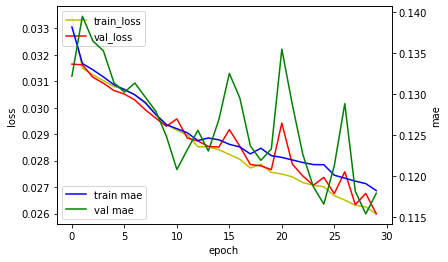

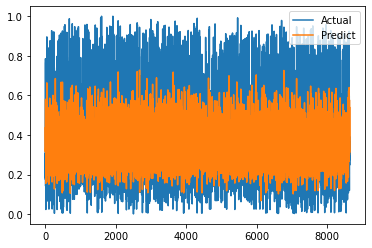

SVM Model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.19549516767217667
MSE =  0.028403007417032555 MAE =  0.12033679379401095 

------------------------------


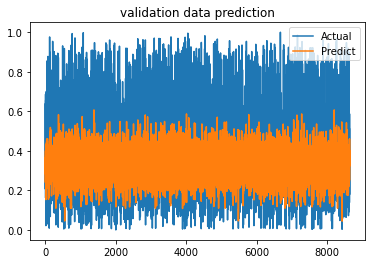

------------------------------
score:  0.20469130416857806
MSE =  0.028112127089432188 MAE =  0.11944949462703665 

------------------------------


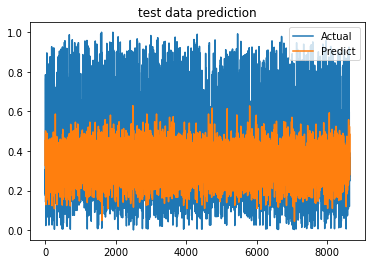

RandomForestRegressor Model


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

결정계수 :  0.9913779811701251
MSE:  0.00030476630066207395
MAE:  0.005049064208674313
------------------------------


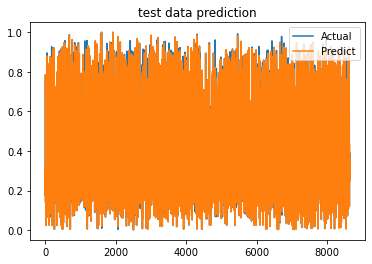

------------------------------------------------------------


In [ ]:
data_5 = dataset_list[4]
print("이번에 사용한 데이터셋: ",data_5['filename'])
X_train, X_val, X_test, y_train, y_val, y_test = make_dataset(data_5)
print('------------'*5)
print("Base Model")
base_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("SVM Model")
svm_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("RandomForestRegressor Model")
best_para_ = Grid_Model(X_train,y_train)
rfr_model(X_train, X_val, X_test, y_train, y_val, y_test)
print('------------'*5)

## 6 DataSet

이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210824111504_kdu_1.0_lie_none.csv
이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210824111504_kdu_1.0_lie_none.csv
------------------------------------------------------------
Base Model
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_40 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 31        
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________
------------------------------
Epoch 1/30
29/29 [==============================] - 1s 10ms/step - loss: 0.1184 - mse: 0.1184 - mae: 0.2810 - va

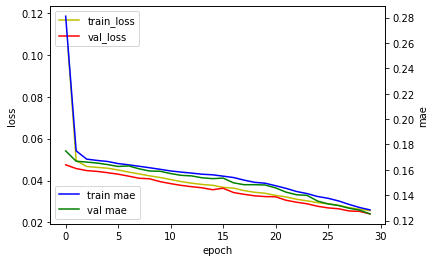

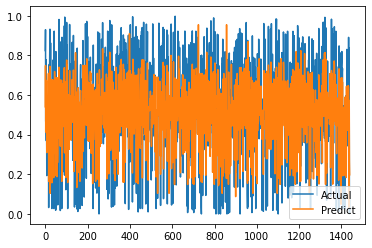

SVM Model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.4466652872916208
MSE =  0.028811319279467708 MAE =  0.1370368717606237 

------------------------------


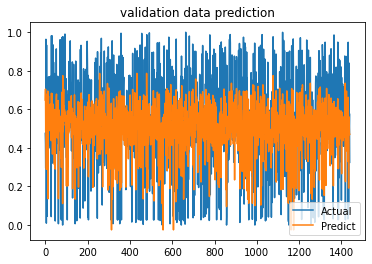

------------------------------
score:  0.4074763210828005
MSE =  0.030842626853641617 MAE =  0.14265836901345677 

------------------------------


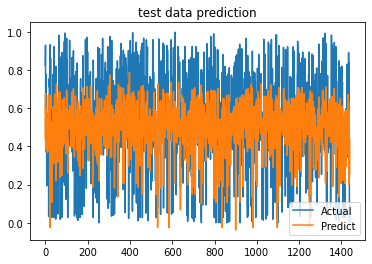

RandomForestRegressor Model


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

결정계수 :  0.9966571475993907
MSE:  0.00017400544971840818
MAE:  0.0045496120309897825
------------------------------


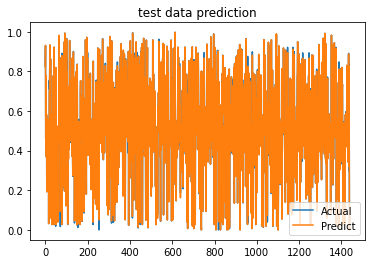

------------------------------------------------------------


In [ ]:
data_6 = dataset_list[5]
print("이번에 사용한 데이터셋: ",data_6['filename'])
X_train, X_val, X_test, y_train, y_val, y_test = make_dataset(data_6)
print('------------'*5)
print("Base Model")
base_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("SVM Model")
svm_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("RandomForestRegressor Model")
best_para_ = Grid_Model(X_train,y_train)
rfr_model(X_train, X_val, X_test, y_train, y_val, y_test)
print('------------'*5)

## 7 DataSet

이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210824121025_chc_0.5_lie_none.csv
이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210824121025_chc_0.5_lie_none.csv
------------------------------------------------------------
Base Model
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_43 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 31        
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________
------------------------------
Epoch 1/30
48/48 [==============================] - 1s 7ms/step - loss: 0.0805 - mse: 0.0805 - mae: 0.2266 - val

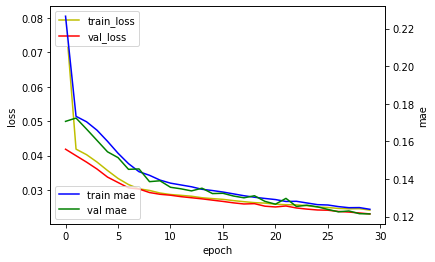

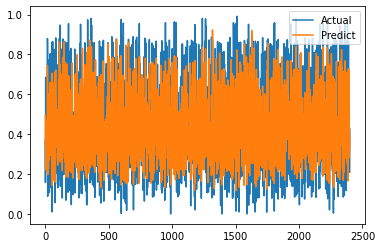

SVM Model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.47575773294523593
MSE =  0.025186139106661475 MAE =  0.12660631093002261 

------------------------------


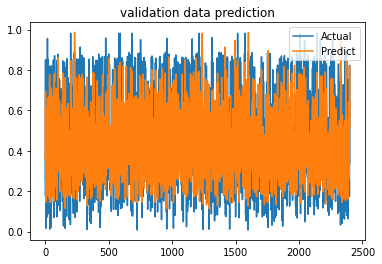

------------------------------
score:  0.4388915782138857
MSE =  0.026960963258010912 MAE =  0.12901399869551805 

------------------------------


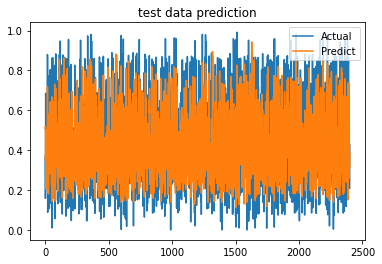

RandomForestRegressor Model


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

결정계수 :  0.9976460033805379
MSE:  0.00011310829405264672
MAE:  0.003546846525440362
------------------------------


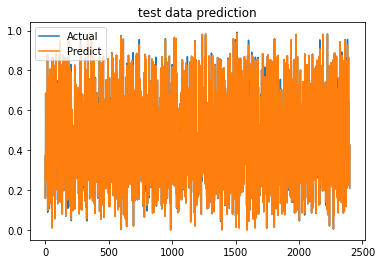

------------------------------------------------------------


In [ ]:
data_7 = dataset_list[6]
print("이번에 사용한 데이터셋: ",data_7['filename'])
X_train, X_val, X_test, y_train, y_val, y_test = make_dataset(data_7)
print('------------'*5)
print("Base Model")
base_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("SVM Model")
svm_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("RandomForestRegressor Model")
best_para_ = Grid_Model(X_train,y_train)
rfr_model(X_train, X_val, X_test, y_train, y_val, y_test)
print('------------'*5)

## 8 DataSet

이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210824141813_kdu_1.0_lie_acryl.csv
이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210824141813_kdu_1.0_lie_acryl.csv
------------------------------------------------------------
Base Model
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_46 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 31        
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________
------------------------------
Epoch 1/30
72/72 [==============================] - 1s 5ms/step - loss: 0.0905 - mse: 0.0905 - mae: 0.2383 - v

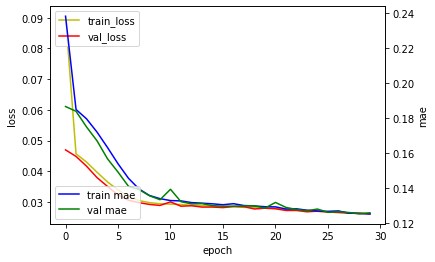

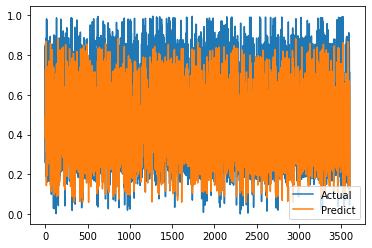

SVM Model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.5319680074725268
MSE =  0.027073443302970134 MAE =  0.12920417705768264 

------------------------------


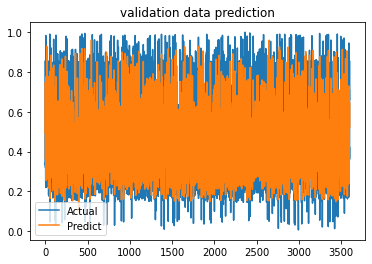

------------------------------
score:  0.526086073510045
MSE =  0.027764409948352407 MAE =  0.13031588092459773 

------------------------------


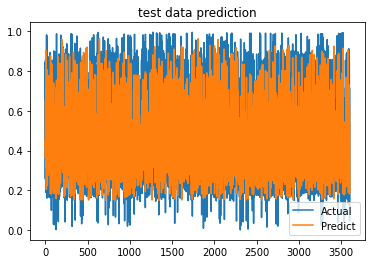

RandomForestRegressor Model


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

결정계수 :  0.9958842608137656
MSE:  0.00024112199203230763
MAE:  0.003953555245555807
------------------------------


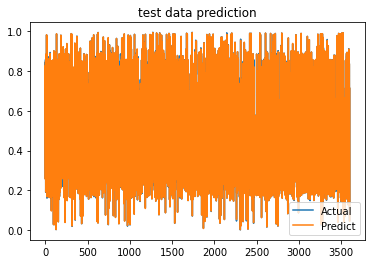

------------------------------------------------------------


In [ ]:
data_8 = dataset_list[7]
print("이번에 사용한 데이터셋: ",data_8['filename'])
X_train, X_val, X_test, y_train, y_val, y_test = make_dataset(data_8)
print('------------'*5)
print("Base Model")
base_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("SVM Model")
svm_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("RandomForestRegressor Model")
best_para_ = Grid_Model(X_train,y_train)
rfr_model(X_train, X_val, X_test, y_train, y_val, y_test)
print('------------'*5)

## 9 DataSet

이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210824141815_kdu_1.0_lie_opaque.csv
이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210824141815_kdu_1.0_lie_opaque.csv
------------------------------------------------------------
Base Model
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_49 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 31        
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________
------------------------------
Epoch 1/30
68/68 [==============================] - 1s 7ms/step - loss: 0.0538 - mse: 0.0538 - mae: 0.1805 -

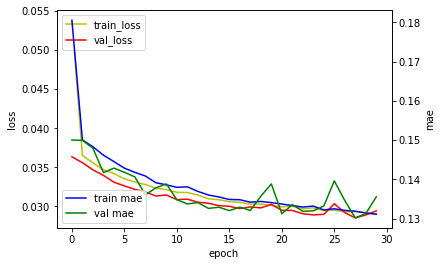

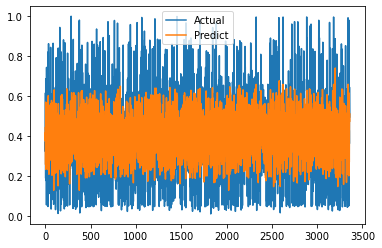

SVM Model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.27064336923550203
MSE =  0.0295434838810968 MAE =  0.1269331593402703 

------------------------------


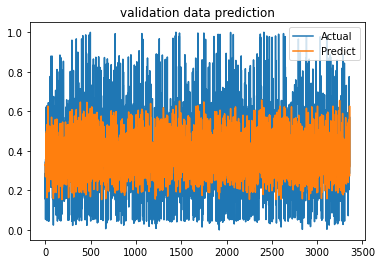

------------------------------
score:  0.2790499750370302
MSE =  0.028468694073734264 MAE =  0.1255079500821912 

------------------------------


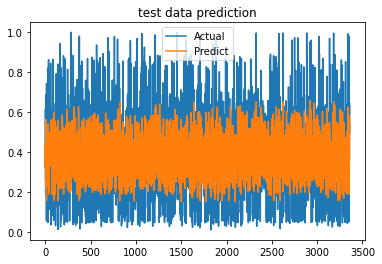

RandomForestRegressor Model


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

결정계수 :  0.9938540086430201
MSE:  0.00024269136786653442
MAE:  0.004905624061803237
------------------------------


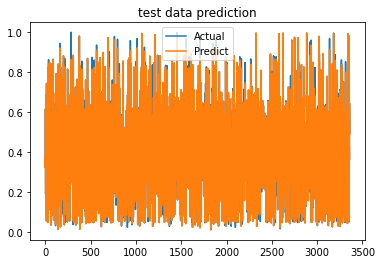

------------------------------------------------------------


In [ ]:
data_9 = dataset_list[8]
print("이번에 사용한 데이터셋: ",data_9['filename'])
X_train, X_val, X_test, y_train, y_val, y_test = make_dataset(data_9)
print('------------'*5)
print("Base Model")
base_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("SVM Model")
svm_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("RandomForestRegressor Model")
best_para_ = Grid_Model(X_train,y_train)
rfr_model(X_train, X_val, X_test, y_train, y_val, y_test)
print('------------'*5)

## 10 DataSet

이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210906175352_1.0_lie_gmk.csv
이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210906175352_1.0_lie_gmk.csv
------------------------------------------------------------
Base Model
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_52 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 31        
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________
------------------------------
Epoch 1/30
39/39 [==============================] - 1s 10ms/step - loss: 0.0519 - mse: 0.0519 - mae: 0.1782 - val_loss: 0.

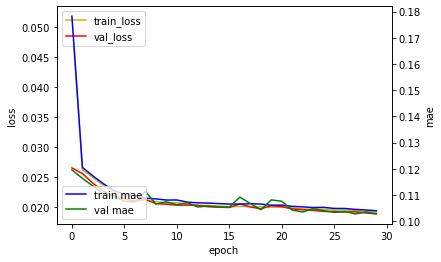

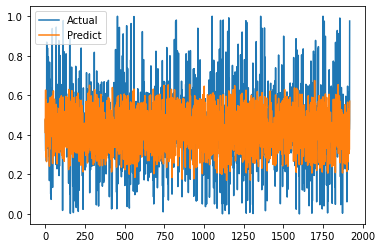

SVM Model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.48230336072582025
MSE =  0.015579978225153186 MAE =  0.09473043958290936 

------------------------------


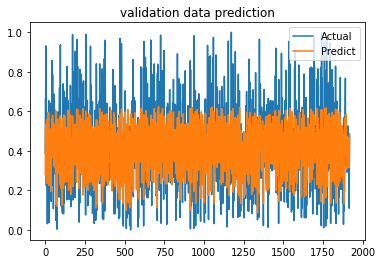

------------------------------
score:  0.47344394526651024
MSE =  0.015479627513771858 MAE =  0.09436799105920478 

------------------------------


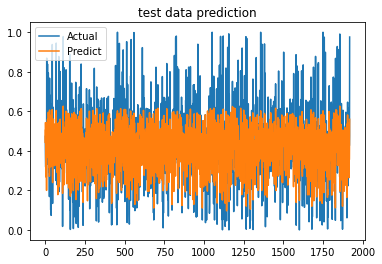

RandomForestRegressor Model


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

결정계수 :  0.994857515400597
MSE:  0.00015117810417042434
MAE:  0.003340465038957518
------------------------------


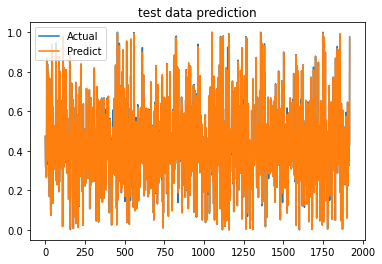

------------------------------------------------------------


In [ ]:
data_10 = dataset_list[9]
print("이번에 사용한 데이터셋: ",data_10['filename'])
X_train, X_val, X_test, y_train, y_val, y_test = make_dataset(data_10)
print('------------'*5)
print("Base Model")
base_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("SVM Model")
svm_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("RandomForestRegressor Model")
best_para_ = Grid_Model(X_train,y_train)
rfr_model(X_train, X_val, X_test, y_train, y_val, y_test)
print('------------'*5)

## 11 DataSet

이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210908142718_kdu_1.0_lie_acryl111.csv
이번에 사용한 데이터셋:  /content/drive/MyDrive/Waffle/log_20210908142718_kdu_1.0_lie_acryl111.csv
------------------------------------------------------------
Base Model
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_55 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 31        
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________
------------------------------
Epoch 1/30
5/5 [==============================] - 1s 53ms/step - loss: 0.3327 - mse: 0.3327 - mae: 0.480

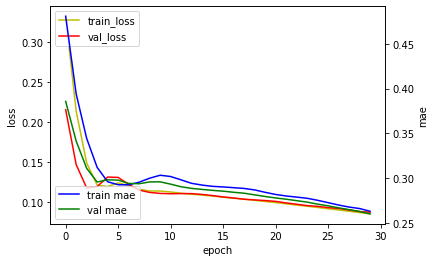

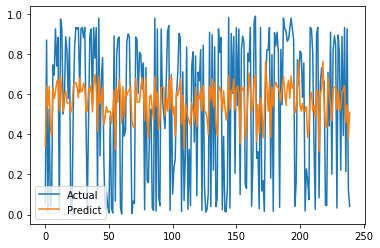

SVM Model
score:  0.8387104193471089
MSE =  0.020169792170796216 MAE =  0.11458519540185959 

------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


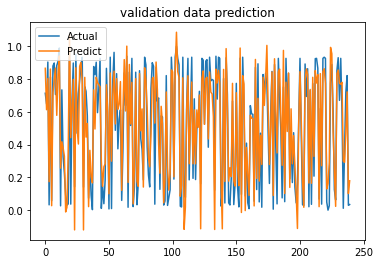

------------------------------
score:  0.7760580485689852
MSE =  0.02896007688616227 MAE =  0.13524356348761243 

------------------------------


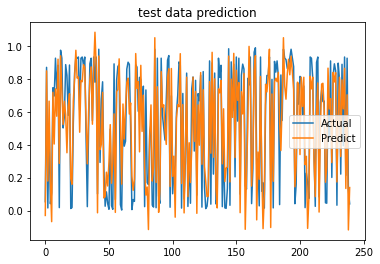

RandomForestRegressor Model


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

결정계수 :  0.9913385002922669
MSE:  0.0011201014186155913
MAE:  0.011243558415474371
------------------------------


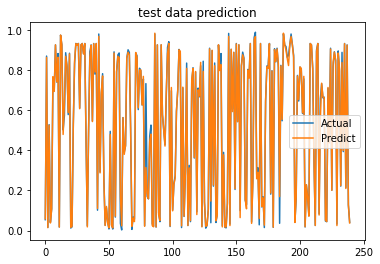

------------------------------------------------------------


In [ ]:
data_11 = dataset_list[10]
print("이번에 사용한 데이터셋: ",data_11['filename'])
X_train, X_val, X_test, y_train, y_val, y_test = make_dataset(data_11)
print('------------'*5)
print("Base Model")
base_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("SVM Model")
svm_model(X_train, X_val, X_test, y_train, y_val, y_test)
print("RandomForestRegressor Model")
best_para_ = Grid_Model(X_train,y_train)
rfr_model(X_train, X_val, X_test, y_train, y_val, y_test)
print('------------'*5)

## Whole DataSet Using "For"
It takes to much time for run whole Dataset

In [ ]:
for data in tqdm.tqdm(dataset_list):
  print("이번에 사용한 데이터셋: ",data['filename'])
  X_train, X_val, X_test, y_train, y_val, y_test = make_dataset(data)
  print('------------'*5)
  print("Base Model")
  base_model(X_train, X_val, X_test, y_train, y_val, y_test)
  print("SVM Model")
  svm_model(X_train, X_val, X_test, y_train, y_val, y_test)
  print("RandomForestRegressor Model")
  best_para_ = Grid_Model(X_train,y_train)
  rfr_model(X_train, X_val, X_test, y_train, y_val, y_test)
  print('------------'*5)

---